
# Topic 2.3: Building blocks of neural networks

This notebook combines theory with exercises to support the understanding of fundamental building blocks of neural networks. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation by importing your functions to this notebook. Use available markdown sections to fill in your answers to questions as you proceed through the notebook.

**Contents:** <br>

1. [Learning process of a neural network](#learning)
2. [Backpropagation](#backpropagation) - Simplest backpropagation example and exercise (with pen and paper)
3. [Implementation of a neural network](#implementation) (with python)

**References:**<br>

[1] Deep feedforward networks: [LINK](https://www.deeplearningbook.org/contents/mlp.html)


Nowadays most automated medical image analysis tasks are carried out using deep neural networks. These large networks are often seen as black box models, even though the outputs of the networks can 'directly' be calculated from the inputs. With the simple examples given in this notebook we aim for you to understand how neural networks learn. After you completed the exercises of this notebook you are able to:

- explain the fundamental principles behind the learning process of a neural network.
- manually train a simple neural network by doing backpropagation.
- implement a small neural network in python that can be used for the CAD project work.

In [1]:
%load_ext autoreload
%autoreload 2

<div id='learning'></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

## 1. Learning process of a neural network

Let's first understand how a neural network learns. As humans we are capable of learning many tasks throughout our lives. For example, we can easily distinguish cats from dogs in a picture, but we were not able to do this as newborns and we had to learn it along the way. In our upbringing, constant feedback is given by parents and teachers to ensure we can recognize different animals or objects. Eventually, you simply know which animal you observe by taking a quick look at the animal. However, when it comes to rare animals, our distinguishing skills are poor since we have not seen enough examples of these rare animals in our lives.

The working principle of a neural network is analogical. During the training process, known data is fed into the neural network, and the network makes a prediction about what the data represents. Any error in the prediction is used as feedback. As the training process continues, the network weights are adjusted (using backpropagation) until the network starts to make accurate predictions. Then, the model is ready, and can be used to make predictions for unseen images in the inference stage. The learning process is visualized in the figure below. As you can see, the model is only trained on three classes of images (triangles, stars and circles), therefore it will never be able to classify other shapes. However, the model is able to classify a green star as a star, because the training data consists of a large variety of colors, even though a star with this exact color is not seen during the training stage.

<center width="100%"><img src="../reader/assets/00_training_inference.jpg" width="800"></center>

<div id='backpropagation'></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

## 2. Backpropagation
Now that you understand the idea of how a neural network can learn, let's have a look at the calculus behind the learning process. As mentioned before, you want to minimize the loss function, which is done by updating network weights in the backward pass. Backpropagation is carried out by taking small steps in the descending direction of the slope in the loss function. In this notebook we will walk through the absolute simplest backpropagation example to understand what is really happening in the backward pass.

The following videos and book are suggested for a more in-depth explanation of backpropagation:

1. [Video 1: What is backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U&ab_channel=3Blue1Brown)<br>
2. [Video 2: Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8&ab_channel=3Blue1Brown)<br>
3. [deeplearningbook.org - chapter 6](https://www.deeplearningbook.org/contents/mlp.html)<br>


### Simple neural network
The neural network that will be used for this backpropagation example is as follows:

<center width="100%"><img src="../reader/assets/01_simple_network.jpg" width="400"></center>

This network is used to predict a value of $\hat{y}$, given the input $x$, where both $x$ and $y$ are scalars. This network contains only one fully connected layer (without a bias), therefore the output can be calculated as $\hat{y}=w\cdot x$, where $w$ is the network weight. Keep in mind that normally a neural network has millions of weights, but just for the sake of manually carrying out backpropagation, we use a neural network of one single weight.


### Training set
The model needs to be trained to obtain the optimal value for the weight $w$. Normally a large training set is used to find the optimal values for all the weights, but for simplification purposes, our training set consists of a single input-output pair, which is as follows:


| Input ($x$) | Desired output ($y$) |
| :--- | :--- |
| 1.5 | 0.5 |

Because this is such an easy example we know that the solution to this optimization problem is $w = \frac{y}{x} = \frac{0.5}{1.5} \approx 0.33$. However, normally neural networks are used for much more complex optimization problems with millions of parameters (weights) and many more training examples. Therefore, the best solution cannot just simply be calculated like this, and an iterative training approach is needed where the network weights are optimized one step at a time.


### Model initialization
This optimization process predicts the output $\hat{y}$ given an input $x$ and a weight $w$. The weight $w$ is updated such that the predicted output $\hat{y}$ becomes more similar to $y$. To start this optimization process, the model weight $w$ is initialized with a random value, let's say $0.8$. We can now calculate the predicted value (after zero epochs, i.e. at initialization) of $\hat{y}$, given that $x=1.5$ and $w=0.8$:

|Epoch | Input ($x$) | Desired output ($y$) | Weight ($w$) | Predicted output ($\hat{y}$) |
| :--- | :--- | :--- | :--- | :--- |
|0 (init) | 1.5 | 0.5 | 0.8 | 1.2 |


### Training & loss function
Now the question is how the model needs to be trained such that the predicted output reaches the desired output of $0.5$. For this training process, a loss function is defined. The model will try to minimize the value of the loss function, and therefore the loss function gives the model feedback on how the network weights should be updated. The loss function for this example is defined as the squared difference between the predicted and the desired output:

\begin{equation}
L = (\hat{y} - y)^2
\end{equation}

The loss function with respect to the weight is visualized for the given training pair in the following figure. It can be seen that the loss function is a parabola with a minimum around $0.33$ (green dot), which is in line with the solution we calculated earlier. 

<center width="100%"><img src="../reader/assets/02_Loss_function.jpg" width="500"></center>

You can see that for the current weight, $w=0.8$ (red dot), the loss function is not at the minimum. The backpropagation algorithm seeks to minimize the loss by descending along the loss function (red arrow), which is called gradient descent. To take a descending step in the direction of the slope, the derivative of the loss function needs to be calculated.


<div id='exercise2_1'></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 2.1*:

- Given the model $\hat{y}=wx$ and the loss function $L = (\hat{y} - y)^2$, find the derivative of the loss function with respect to the weight: $\frac{\partial L}{\partial w}$. (**Tip**: Use the chain rule: $\frac{\partial L}{\partial w}=\frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w}$)<br>
2W(WX-0.5)

- Fill in the values of the training set: $x=1.5$ and $y=0.5$.
4.5*W-1.5


<div id='learning_rate'></div>

### Learning rate

After calculating the derivative, the model weight is updated by taking a step along the slope. Therefore, a step size needs to be formulated with care. If the step size is too small, it will take many steps before the minimum is reached, or a more complex model can get stuck in a local minimum. But if the step size is too large, the minimum will not exactly be reached because the red dot 'bounces' around the minimum. This step size is usually called the learning rate. For this example, we take a learning rate ($r$) of $0.1$.

Now the weight can be updated according to the gradient descent and the learning rate as follows:
\begin{equation}
w_{new} = w_{old} - r \frac{\partial L}{\partial w}
\end{equation}

After one step (i.e. after one epoch, since we have a training set size of 1), the weight is updated to 

\begin{equation}
w_{new} = 0.8 - 0.1 \frac{\partial L}{\partial w}(x=1.5, y=0.5, w=0.8) \approx 0.59,
\end{equation}

Which means that the updated predicted value is: $\hat{y}=0.59\cdot 1.5 \approx 0.89$.


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 2.2*:

Calculate the weights and predicted outputs for the next epochs until the model converges (i.e. the weight is approximately 0.33). Fill in (and continue) the following table:

|Epoch | Input ($x$) | Desired output ($y$) | Weight ($w$) | Predicted output ($\hat{y}$) |
| :--- | :--- | :--- | :--- | :--- |
|0 (init) | 1.5 | 0.5 | 0.8 | 1.2 |
|1 | 1.5 | 0.5 | 0.59 | 0.89 |
|2 | 1.5 | 0.5 |  |  |
|3 | 1.5 | 0.5 |  |  |
|.. | .. | .. |  |  |
|n | 1.5 | 0.5 |  |  |

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 2.1*:
After approximately how many epochs does the model converge? 

<font style="color:red">Type your answer here</font>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 2.2*:
What is the reason for the fast convergence in the beginning of the training and the slow convergence later on, despite the fact that the step size (learning rate) is constant?

<font style="color:red">Type your answer here</font>

### Following model training
Normally this process is done using python because the model is much more complex and then you want to follow the training process to know when the model is done training. To know this you can inspect the loss curve during training.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 2.3*:
In the following python cell, the example model is implemented. To run the code, you need to **add an extra line** in the `model_training()` function in `SECTION 3` of the `cad_tests.py` module. Define in the formula of $\frac{\partial L}{\partial w}(w,x,y)$ which you obtained from the first part of [Exercise 2.1](#exercise2_1). Once you have added the missing line, you can test it below. Inspect the training curve and check the results of exercise [Exercise 2.1](#exercise2_1) with the table that is printed by this code cell.

Epoch		Weight		Predicted
0		0.80000		1.20000
1		0.59000		0.88500
2		0.47450		0.71175
3		0.41097		0.61646
4		0.37604		0.56405
5		0.35682		0.53523
6		0.34625		0.51938
7		0.34044		0.51066
8		0.33724		0.50586
9		0.33548		0.50322
10		0.33452		0.50177
11		0.33398		0.50098
12		0.33369		0.50054
13		0.33353		0.50029
14		0.33344		0.50016
15		0.33339		0.50009
16		0.33337		0.50005
17		0.33335		0.50003
18		0.33334		0.50001
19		0.33334		0.50001
20		0.33334		0.50000


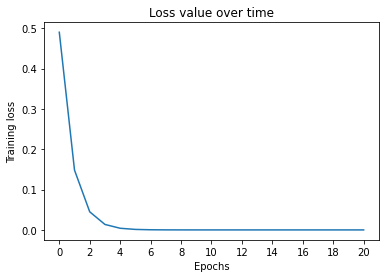

In [2]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
sys.path.append('../code')

from cad_tests import model_training

model_training()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 2.3*:
What do you think of the training process when looking at the loss plot? 

- Do you think the model was trained for enough epochs? Explain your answer.<br>
- Do you think the step size of 0.1 was appropriate for the given model? Explain your answer.<br>
- How could you in a real application (objectively) define when the model finished training?

<font style="color:red">Type your answer here</font>

<div id='implementation'></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

## 3. Neural network implementation

### Project computer-aided diagnosis (CAD)

For the CAD project you are asked to implement a logistic regression model for classifying nuclei in histopathology images as either big or small. In this notebook we will implement a small neural network that can also classify these nuclei. When you have finished these exercises, you are free to include these results in your project work.

Before continuing with the exercises in this notebook, make sure that you have read the description of the [CAD project](../reader/2.5_CAD_project.ipynb), especially for the binary classification. You do not need to complete the project before starting the following exercises, but just read the description to understand the task. The description states that one image has $24 \times 24 \times 3=1728$ features. Optimally, these features are used in the image space and captured with a convolutional neural network, but for simplification purposes and carrying out a numpy implementation we are still going to used these $1728$ features flattened in a 1D vector. We will use the following neural network, consisting of two fully connected layers and their activation functions (sigmoid activation: $\sigma$).

<center width="100%"><img src="../reader/assets/03_fully_connected_network.jpg" width="700"></center>

As you can see, the number of features decrease every layer. They start at $1728$, then go to $1000$ and the model outputs only a single value for a given input. This output is a prediction on whether the nuclei is large (output is $1$) or small (output is $0$).

### Data loading & preprocessing

To implement a neural network we need the training, validation and test set. In this implementation we will be using a supervised network, which means we also need labels (whether the nuclei should be classified as large or small). The following python cell loads the data and applies preprocessing.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

<div id='exercise_3_1'></div>
    
### *Exercise 3.1*:

Run the following python cell, try to understand what is happening and inspect the example images. You will find the definition of the function `data_preprocessing()` in the `Training` class of `SECTION 3` of the `cad_tests.py` module.

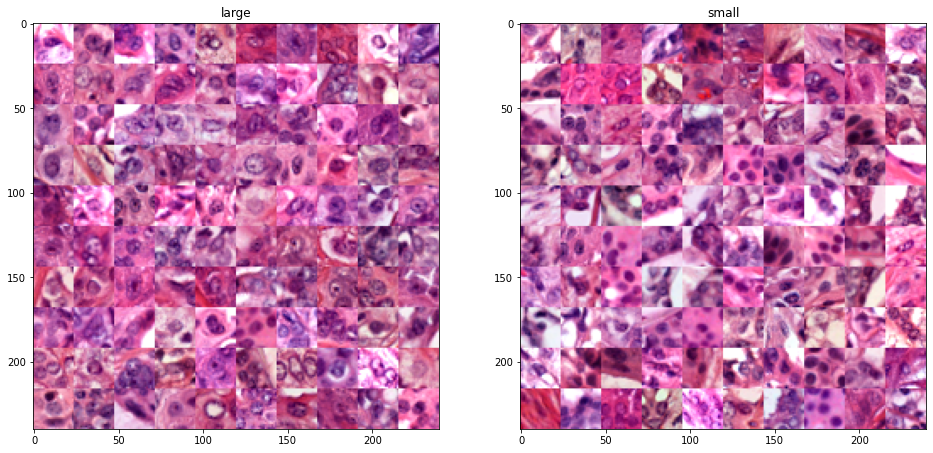

In [3]:
%reset_selective -f regex
import matplotlib.pyplot as plt

from cad_tests import Training
t = Training()

t.data_preprocessing()

### Define initialization values
To train a model, several initialization variables should be defined.

Some values are fixed or are already chosen by us (such as the `learning_rate`, `batchsize` and the number of features in the input, hidden and output layer (`in_features`, `n_hidden_features`, `out_features`, respectively)). This means that the sizes of the weight matrices can be calculated. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

<div id='question3_1'></div>

### *Question 3.1*:

To understand the size of the weight matrices, we show you a small example of a fully connected network, as can be seen in the following figure.

<center width="100%"><img src="../reader/assets/04_weights_example.jpg" width="400"></center>

For this case, the input features $\mathbf{x}$ have the shape `[1,5]` and the output features $\mathbf{\hat{y}}$ have the shape `[1,2]`. We also know that $\mathbf{\hat{y}} = \mathbf{xW}$.

- What is the shape of the matrix $\mathbf{W}$?<br>
- What would happen with the shape of $\mathbf{W}$ if a batch of images is given to the network (i.e. shapes of $\mathbf{x}$ and $\mathbf{\hat{y}}$ are `[batchsize,5]` and `[batchsize,2]`?


<font style="color:red">[5,2]</font>
<font style="color:red">[5,2]</font>


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 3.2*:
Let's go back to the original nuclei problem with the two layer network. Complete the `TODO` block of code in the `define_shapes()` function in the `Training` class of `SECTION 3` of the `cad_tests.py` module by defining the shapes of the weight matrices `w1` and `w2`. When complete, run the python cell below.

In [4]:
t.define_shapes()

{'w1_shape': (1728, 1000), 'w2_shape': (1000, 1)}

### Model functions
Several functions need to be defined before implementing the model.

#### Activation function
As mentioned before, both fully connected layers are followed by a sigmoid activation function, which is defined as:

<center width="100%"><img src="../reader/assets/05_sigmoid.png" width="400"></center>

This activation is used to obtain an eventual output between zero and one, which indicates the probability of a nuclei being large. Such an activation layer simply maps the pixel intensities (x in the plot above) to another range, and no model weights are involved in an activaiton layer.

#### Loss function
The squared difference between the predicted output $\mathbf{\hat{y}}$ and the desired output (the label) $\mathbf{y}$ is again used for the loss function:
\begin{equation}
L = (\mathbf{\hat{y}} - \mathbf{y})^2
\end{equation}

### Forward and backward pass
For training the model, we need to apply the forward and backward pass. In a forward pass the prediction $\hat{\mathbf{y}}$ is calculated for a given input $\mathbf{x}$ with the following steps (assume all hidden layers before or after activation $\mathbf{h1}$, $\mathbf{h2}$ and $\mathbf{h3}$):
\begin{equation}
\mathbf{h_1} = \mathbf{xW_1}
\end{equation}
\begin{equation}
\mathbf{h_2} = \sigma (\mathbf{h_1})
\end{equation}
\begin{equation}
\mathbf{h_3} = \mathbf{h_2W_2}
\end{equation}
\begin{equation}
\mathbf{\hat{y}} = \sigma (\mathbf{h_3})
\end{equation}



Subsequently the backward pass is carried out for updating the weights such that the loss function decreases. The derivatives with respect to the two weight matrices $\mathbf{W_1}$ and $\mathbf{W_2}$ are defined (by the chain rule) as follows:



\begin{equation}
\frac{\partial \mathbf{L}}{\partial \mathbf{W_1}} = 
\frac{\partial \mathbf{L}}{\partial \mathbf{\hat{y}}}
\frac{\partial \mathbf{\hat{y}}}{\partial \mathbf{h_3}}
\frac{\partial \mathbf{h_3}}{\partial \mathbf{h_2}}
\frac{\partial \mathbf{h_2}}{\partial \mathbf{h_1}}
\frac{\partial \mathbf{h_1}}{\partial \mathbf{W_1}} =  2(\mathbf{\hat{y}} - \mathbf{y}) \cdot \sigma \prime(\mathbf{h3}) \cdot \mathbf{W_2} \cdot \sigma \prime(\mathbf{h1}) \cdot \mathbf{x}
\end{equation}


\begin{equation}
\frac{\partial \mathbf{L}}{\partial \mathbf{W_2}} = 
\frac{\partial \mathbf{L}}{\partial \mathbf{\hat{y}}}
\frac{\partial \mathbf{\hat{y}}}{\partial \mathbf{h_3}}
\frac{\partial \mathbf{h_3}}{\partial \mathbf{W_2}} =  2(\mathbf{\hat{y}} - \mathbf{y}) \cdot \sigma \prime(\mathbf{h3}) \cdot \mathbf{h_2}
\end{equation}



<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 3.3*:
The forward pass and the derivatives of the backward pass are implemented in the `forward()` and `backward` in `SECTION 3` of the `cad_tests.py` module, respectively. The model weights are not yet updated, and the new model weights need to be defined as a function of the old weights (`w1` and `w2`), `learning_rate`, and the derivatives (`dL_dw1` and `dL_dw2`). Complete the missing implementation. (**Tip:** Have a look at the [first](#learning_rate) part of this notebook).

### Model training & validation
The [backpropagation example](#backpropagation) in the first part of this notebook is based on a single input-label training pair, but this implementation is based on a training set of 14607 image-label pairs. As discovered in [Question 3.1](#question3_1), the number of examples given as input (in that case either `1` or `batchsize`) does not affect the size of the weight matrix. Therefore you can choose to show more image-label pairs at the same time such that less passes are needed to 'see' the entire training set. 

For this model we choose a batchsize of 128, which means that 128 image-label pairs are given to the model at a time and then the model updates its weights according to the losses of these 128 pairs. Subsequently the next batch of images is given to the model and after batch several iterations the model completed a full epoch where the whole training set is seen once.

Normally, the model needs to train for many epochs to converge. The function `launch_training()` in `SECTION 3` of the `cad_tests.py` module implements a training for 100 epochs. As you can see, there are two for-loops: one for-loop for the epoch and one for-loop for the batch. After every epoch is completed, the validation set is fed through the network (all at once) to calculate the validation loss and the model performance (accuracy) over time.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>

### *Exercise 3.4*:

Inspect the `launch_training()` function of the `Training` class in more detail, and run the following code cell. **NOTE**: It takes some time to do all the calculations.

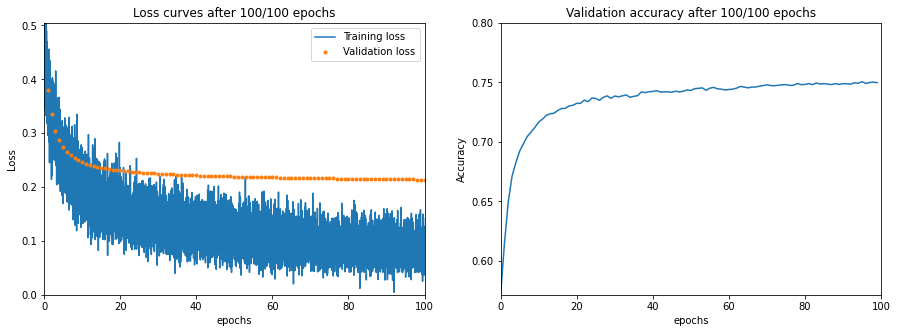

> Training finished


In [5]:
import sys
sys.path.append('../code')

t.launch_training()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 3.2*:

Inspect the results of the training.

- Do you think the model is suitable for this task, and that it is trained well?
- What is remarkable about the loss curves? What is this phenomena called?
- Could you think of solutions for reducing the gap between training and validation loss?

<font style="color:red">Type your answer here</font>

### Final model performance
Inspecting the model's training and performance on the validation set is useful for making adaptations to your model to eventually obtain the best model for this task. After the model is fully optimized, you want to present you final performance on a test set that has not yet been used in the optimization process. In the following Python cell, the complete test set is fed through the network and the final test accuracy is given. All test predictions are visualized in a histogram with the color of the given label.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>

### *Question 3.3*:

Run the following cell below.

- If you completed the entire code correctly a test accuracy of 0.76 is given, did you obtain the same result?
- What is noticeable about the shown histogram?

Test accuracy: 0.76


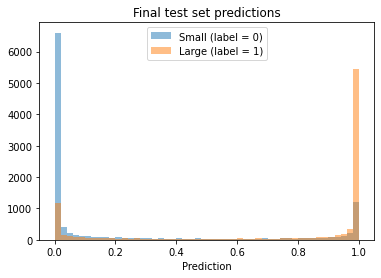

In [7]:
t.pass_on_test_set()

<font style="color:red">Type your answer here</font>